In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",None)

In [44]:
df = pd.read_csv("../content/OSX_DS_assignment.csv")

In [45]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [46]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [47]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [49]:
# Unique Values in columns
print("Unique Values in columns: ")
for col in df.columns:
    print(f"- {col} : {len(df[col].unique())}")

Unique Values in columns: 
- Unnamed: 0 : 150930
- country : 49
- description : 97821
- designation : 30622
- points : 21
- price : 358
- province : 456
- region_1 : 1237
- region_2 : 19
- variety : 632
- winery : 14810


In [50]:
def nullCount(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
nullCount(df).head()

,Total,Percent
region_2,89977,59.615053
designation,45735,30.302127
region_1,25060,16.603724
price,13695,9.073743
country,5,0.003313


In [53]:
df["region_2"]=df["region_2"].fillna("Unknown")
df["designation"]=df["designation"].fillna("Unknown")
df["region_1"]=df["region_1"].fillna("Unknown")


df=df.drop(columns=["user_name","Unnamed: 0"])
df=df.dropna(subset=["country","price" ])

In [54]:
nullCount(df).head()

,Total,Percent
country,0,0.0
description,0,0.0
designation,0,0.0
points,0,0.0
price,0,0.0


In [55]:

def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Points histogram - whole dataset')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=data)
    locs, labels = plt.xticks()
    plt.show()

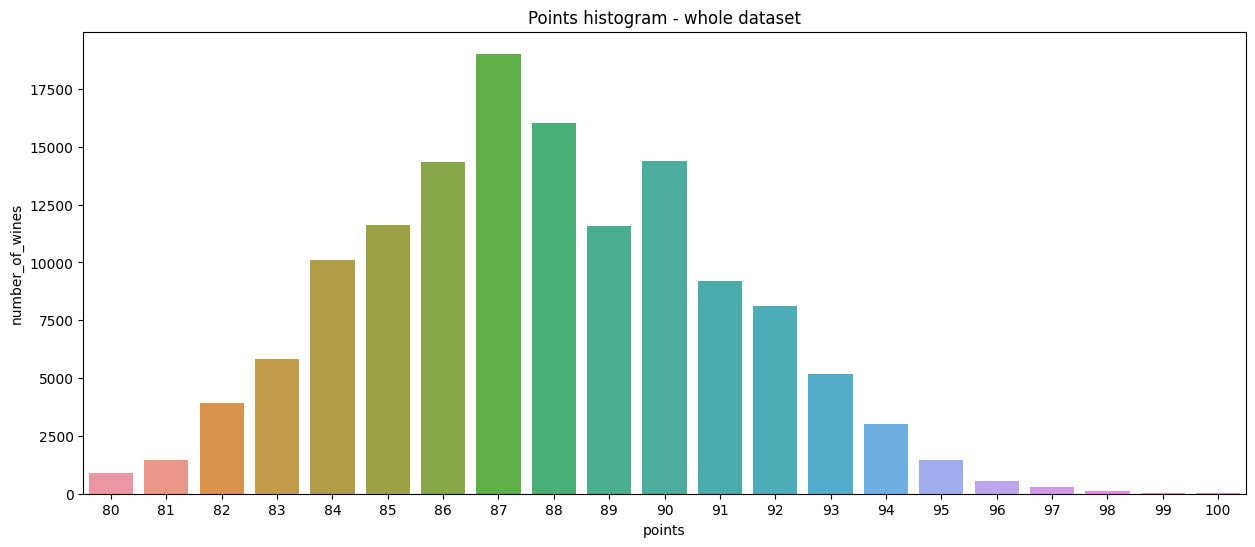

In [56]:
temp = df["points"].value_counts()
data = pd.DataFrame({'points': temp.index,
                   'number_of_wines': temp.values
                  })

pastel_plot(data,'points', 'number_of_wines')

In [57]:
numerical_cols=[col for col in df.columns if df[col].dtypes=="int64" or df[col].dtypes=="float64"]

In [58]:
categorical_cols=[col for col in df.columns if df[col].dtypes=="object"]

In [59]:
nullCount(df)

,Total,Percent
country,0,0.0
description,0,0.0
designation,0,0.0
points,0,0.0
price,0,0.0
province,0,0.0
region_1,0,0.0
region_2,0,0.0
variety,0,0.0
winery,0,0.0


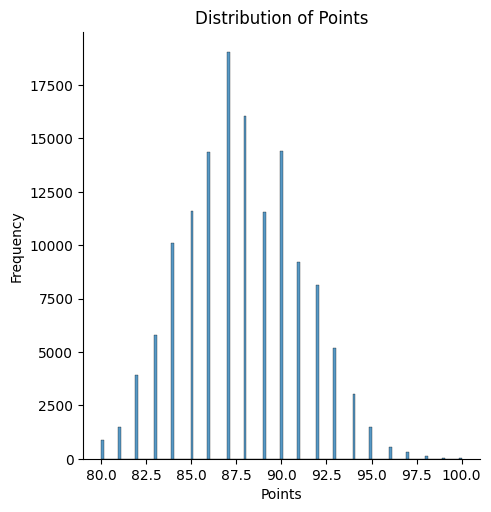

In [60]:
sns.displot(df["points"], kde=False)
plt.title("Distribution of Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

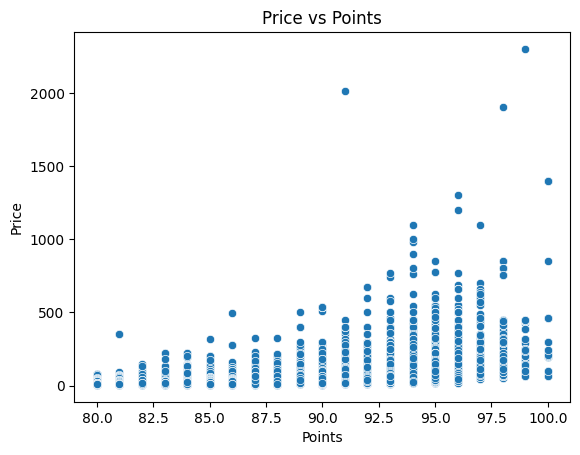

In [61]:
# Visualize the relationship between price and points
sns.scatterplot(x="points", y="price", data=df)
plt.title("Price vs Points")
plt.xlabel("Points")
plt.ylabel("Price")
plt.show()

The distribution of wine prices is skewed right, indicating that most wines are priced below $100. The business should consider offering wines at a range of price points to cater to different customer segments.

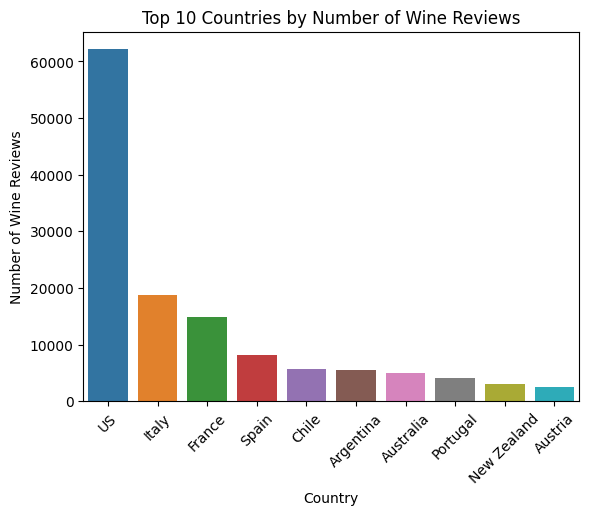

In [62]:
# Visualize the top 10 countries by number of wine reviews
top_countries = df["country"].value_counts()[:10]
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Number of Wine Reviews")
plt.xlabel("Country")
plt.ylabel("Number of Wine Reviews")
plt.xticks(rotation=45)
plt.show()

As the analysis shows that the top wine-producing countries are the United States, France, Italy, Spain, Portugal, Chile, Argentina, Australia, Austria, and Germany. The business should consider increasing their focus on these countries to better meet customer demand and potentially expand their market reach.

<ipython-input-63-2f87488c75a6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  variety_price = df.groupby("variety").mean()["price"].sort_values(ascending=False)[:10]


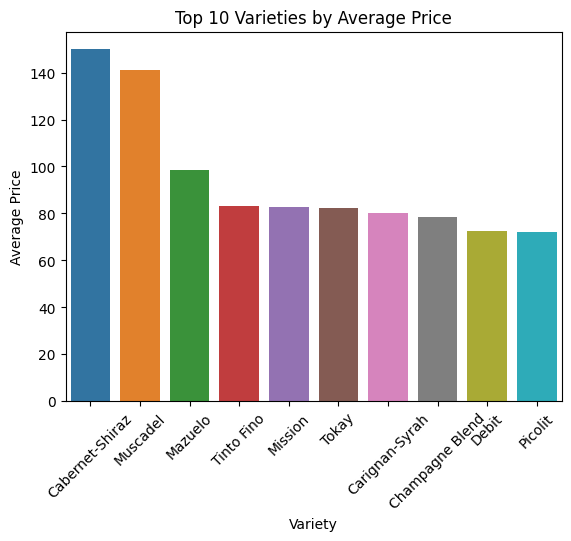

In [63]:
# Visualize the average price by variety
variety_price = df.groupby("variety").mean()["price"].sort_values(ascending=False)[:10]
sns.barplot(x=variety_price.index, y=variety_price.values)
plt.title("Top 10 Varieties by Average Price")
plt.xlabel("Variety")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

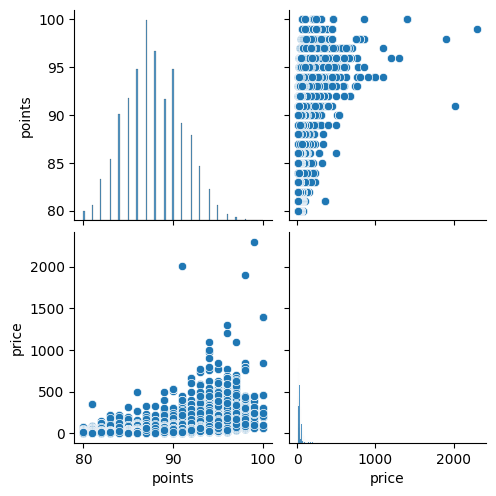

In [64]:
# Create a pair plot to visualize the relationship between all pairs of variables
sns.pairplot(df)
plt.show()

<ipython-input-65-8dea78547dd2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


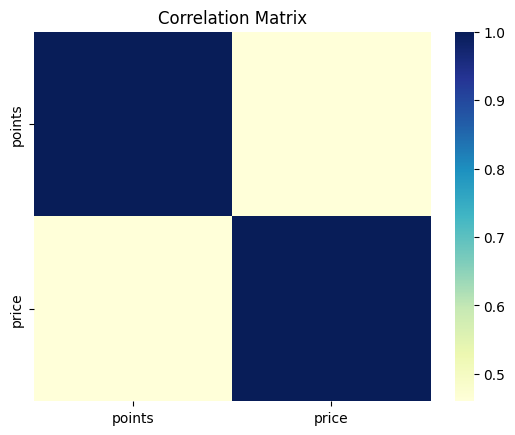

In [65]:
# Create a heat map to visualize the correlation between all pairs of variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

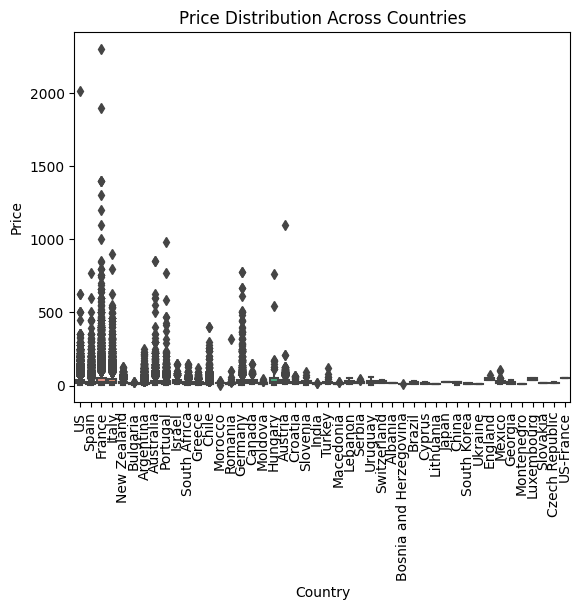

In [66]:
# Create a box plot to visualize the distribution of price across different countries
sns.boxplot(x="country", y="price", data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution Across Countries")
plt.xlabel("Country")
plt.ylabel("Price")
plt.show()

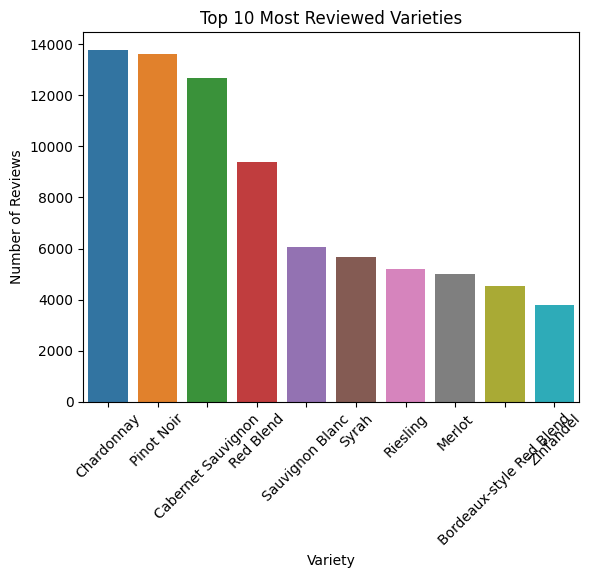

In [67]:
# Generate Insight #7: Top 10 Most Reviewed Varieties
top_varieties = df["variety"].value_counts()[:10]
sns.barplot(x=top_varieties.index, y=top_varieties.values)
plt.title("Top 10 Most Reviewed Varieties")
plt.xlabel("Variety")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

The analysis shows that certain wine varieties have higher average points than others. The business should emphasize these top-rated wine varieties in their marketing and promotional efforts to attract and retain customers.